In [53]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
os.listdir('../data')

['core_1100_dtw_agemodel.csv',
 'LR04stack.csv',
 'core_1100.csv',
 'core_1100_d13C_pl.csv',
 'core_1150_d13C_pl.csv',
 'core_1100_d18O_pl.csv',
 'core_1150_d13C_bulk.csv',
 'core_1100_aragonite.csv',
 'core_1150_d18O_bulk.csv',
 'core_1150.csv',
 'core_1150_aragonite.csv',
 'core_1150_d18O_pl.csv']

In [7]:
[x for x in os.listdir('../out') if x.endswith('.csv')]

['d18O_pl_LR04stack_core_1100_out.csv',
 'd18O_pl_core_1100_dtw_agemodel_core_1150_out.csv',
 'd18O_pl_LR04stack_core_1150_out.csv']

In [8]:
df1 = pd.read_csv("../data/LR04stack.csv")

In [9]:
df1.columns

Index(['time', 'd18O'], dtype='object')

In [10]:
df1 = df1[df1['time'] <= 280]

In [13]:
df2 = pd.read_csv("../out/d18O_pl_core_1100_dtw_agemodel_core_1150_out.csv")

In [14]:
df2.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [17]:
df3 = pd.read_csv("../out/d18O_pl_LR04stack_core_1100_out.csv")

In [18]:
df3.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [21]:
df4 = pd.read_csv("../out/d18O_pl_LR04stack_core_1150_out.csv")

In [22]:
df4.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]', 'sed_rates [m/kyr]'], dtype='object')

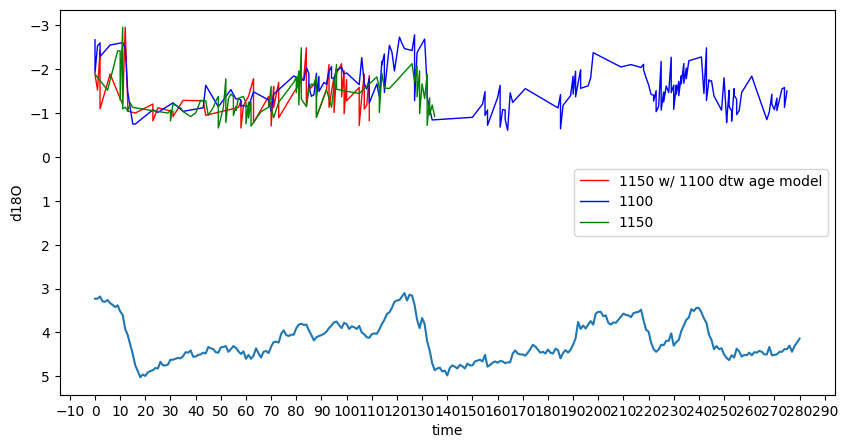

In [60]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,5)
sns.lineplot(ax=ax, x='time', y='d18O', data=df1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df2, estimator=None, color='red', linewidth=1, label='1150 w/ 1100 dtw age model')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df3, estimator=None, color='blue', linewidth=1, label='1100')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df4, estimator=None, color='green', linewidth=1, label='1150')
ax.invert_yaxis()

loc = ticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

In [63]:
f.savefig('../out/fig05.svg')